# WeatherPy

## Analysis

In [59]:
import pandas as pd
import json
import requests as rq
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from citipy import citipy
from pprint import pprint
import time

In [50]:
city_info = citipy.nearest_city(22.99, 120.21)
att = dir(city_info)
print(att)
city = city_info.city_name
print(city)
country = city_info.country_code
print(country)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'city_name', 'country_code']
tainan
tw


## Generate Cities List

In [51]:
weather_df = pd.DataFrame(columns= ['City','Country'])
for i in range(1000):
    lat = np.random.uniform(low= -90, high=90)
    long = np.random.uniform(low=-180, high=180)
    city_info = citipy.nearest_city(lat, long)
    city = city_info.city_name
    country = city_info.country_code
    weather_df = weather_df.append({'City':city, 'Country':country}, ignore_index=True)
    
weather_df.head()

,City,Country
0,sao felix do xingu,br
1,dikson,ru
2,taolanaro,mg
3,itaituba,br
4,rikitea,pf


## Perform API Calls

In [52]:
weather_df["Temperature (F)"] = ""
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Wind Speed (mph)"] = ""
weather_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,sao felix do xingu,br,,,,,,
1,dikson,ru,,,,,,
2,taolanaro,mg,,,,,,
3,itaituba,br,,,,,,
4,rikitea,pf,,,,,,


In [53]:
url = 'http://api.openweathermap.org/data/2.5/weather'

print("Beginning Data Retrieval")
city_count = 0

for index, row in weather_df.iterrows():
    target_city = row["City"]
    city = target_city.replace(" ","")
    params = {'q':city, 'APPID':'23c333dd9ad6b00441baded0602a84c7', 'units':'IMPERIAL'}
    city_data = rq.get(url, params=params).json()
    
    if city_data["cod"] == "404":
        continue
    else:  
        print("------------------------")
        print("Proceesing Record : " , city_count+1, ' of Set 1' ' | ' , city_data["name"])
        print(url+"?"+"&APPID=23c333dd9ad6b00441baded0602a84c7"+"&units=IMPERIAL"+"&q="+city)
        weather_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        weather_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        weather_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        weather_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        weather_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        weather_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        city_count += 1
        if city_count == 500:
            break
            
print(f"Complete Data Retrieval of {city_count} cities")

Beginning Data Retrieval
------------------------
Proceesing Record :  1  of Set 1 |  Dikson
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=dikson
------------------------
Proceesing Record :  2  of Set 1 |  Itaituba
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=itaituba
------------------------
Proceesing Record :  3  of Set 1 |  Rikitea
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=rikitea
------------------------
Proceesing Record :  4  of Set 1 |  Dondo
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=dondo
------------------------
Proceesing Record :  5  of Set 1 |  Esna
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=esna
------------------------
Proceesing Record :  6  of Set 1 |  Butaritari
http://a

------------------------
Proceesing Record :  46  of Set 1 |  Kapaa
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=kapaa
------------------------
Proceesing Record :  47  of Set 1 |  Sistranda
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=sistranda
------------------------
Proceesing Record :  48  of Set 1 |  Longyearbyen
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=longyearbyen
------------------------
Proceesing Record :  49  of Set 1 |  Obo
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=obo
------------------------
Proceesing Record :  50  of Set 1 |  Lompoc
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=lompoc
------------------------
Proceesing Record :  51  of Set 1 |  Pisco
http://api.openweather

------------------------
Proceesing Record :  91  of Set 1 |  Hajnowka
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=hajnowka
------------------------
Proceesing Record :  92  of Set 1 |  Pavlodar
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=pavlodar
------------------------
Proceesing Record :  93  of Set 1 |  Nome
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=nome
------------------------
Proceesing Record :  94  of Set 1 |  Butaritari
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=butaritari
------------------------
Proceesing Record :  95  of Set 1 |  Tiksi
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=tiksi
------------------------
Proceesing Record :  96  of Set 1 |  Bluff
http://api.openweather

------------------------
Proceesing Record :  136  of Set 1 |  Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=saint-philippe
------------------------
Proceesing Record :  137  of Set 1 |  Longyearbyen
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=longyearbyen
------------------------
Proceesing Record :  138  of Set 1 |  Rikitea
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=rikitea
------------------------
Proceesing Record :  139  of Set 1 |  Mataura
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=mataura
------------------------
Proceesing Record :  140  of Set 1 |  Georgetown
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=georgetown
------------------------
Proceesing Record :  141  of S

------------------------
Proceesing Record :  182  of Set 1 |  Santarosa
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=santarosa
------------------------
Proceesing Record :  183  of Set 1 |  Mataura
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=mataura
------------------------
Proceesing Record :  184  of Set 1 |  Gizo
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=gizo
------------------------
Proceesing Record :  185  of Set 1 |  Manggar
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=manggar
------------------------
Proceesing Record :  186  of Set 1 |  Hilo
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=hilo
------------------------
Proceesing Record :  187  of Set 1 |  Cap-aux-Meules
http://api.open

------------------------
Proceesing Record :  228  of Set 1 |  Ayagoz
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=ayagoz
------------------------
Proceesing Record :  229  of Set 1 |  Beloha
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=beloha
------------------------
Proceesing Record :  230  of Set 1 |  Busselton
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=busselton
------------------------
Proceesing Record :  231  of Set 1 |  Jamestown
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=jamestown
------------------------
Proceesing Record :  232  of Set 1 |  Castro
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=castro
------------------------
Proceesing Record :  233  of Set 1 |  Merauke
http://api.o

------------------------
Proceesing Record :  273  of Set 1 |  Butaritari
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=butaritari
------------------------
Proceesing Record :  274  of Set 1 |  Ilulissat
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=ilulissat
------------------------
Proceesing Record :  275  of Set 1 |  Strezhevoy
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=strezhevoy
------------------------
Proceesing Record :  276  of Set 1 |  Bredasdorp
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=bredasdorp
------------------------
Proceesing Record :  277  of Set 1 |  Atuona
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=atuona
------------------------
Proceesing Record :  278  of Set 1 |  Hi

------------------------
Proceesing Record :  318  of Set 1 |  Luderitz
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=luderitz
------------------------
Proceesing Record :  319  of Set 1 |  Husavik
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=husavik
------------------------
Proceesing Record :  320  of Set 1 |  Mataura
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=mataura
------------------------
Proceesing Record :  321  of Set 1 |  Zaysan
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=zaysan
------------------------
Proceesing Record :  322  of Set 1 |  Mataura
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=mataura
------------------------
Proceesing Record :  323  of Set 1 |  Busselton
http://api.o

------------------------
Proceesing Record :  363  of Set 1 |  Luancheng
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=luancheng
------------------------
Proceesing Record :  364  of Set 1 |  Namatanai
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=namatanai
------------------------
Proceesing Record :  365  of Set 1 |  Albany
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=albany
------------------------
Proceesing Record :  366  of Set 1 |  Kapaa
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=kapaa
------------------------
Proceesing Record :  367  of Set 1 |  Yellowknife
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=yellowknife
------------------------
Proceesing Record :  368  of Set 1 |  Kapaa
http:/

------------------------
Proceesing Record :  408  of Set 1 |  Kushiro
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=kushiro
------------------------
Proceesing Record :  409  of Set 1 |  Saldanha
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=saldanha
------------------------
Proceesing Record :  410  of Set 1 |  Butaritari
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=butaritari
------------------------
Proceesing Record :  411  of Set 1 |  Chicama
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=chicama
------------------------
Proceesing Record :  412  of Set 1 |  Iqaluit
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=iqaluit
------------------------
Proceesing Record :  413  of Set 1 |  Leningradskiy


------------------------
Proceesing Record :  453  of Set 1 |  Paamiut
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=paamiut
------------------------
Proceesing Record :  454  of Set 1 |  Jamestown
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=jamestown
------------------------
Proceesing Record :  455  of Set 1 |  Hilo
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=hilo
------------------------
Proceesing Record :  456  of Set 1 |  Aden
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=aden
------------------------
Proceesing Record :  457  of Set 1 |  Thompson
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=thompson
------------------------
Proceesing Record :  458  of Set 1 |  Mataura
http://api.openweath

------------------------
Proceesing Record :  498  of Set 1 |  Souillac
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=souillac
------------------------
Proceesing Record :  499  of Set 1 |  Hamilton
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=hamilton
------------------------
Proceesing Record :  500  of Set 1 |  Tuatapere
http://api.openweathermap.org/data/2.5/weather?&APPID=23c333dd9ad6b00441baded0602a84c7&units=IMPERIAL&q=tuatapere
Complete Data Retrieval of 500 cities


In [55]:
weather_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,sao felix do xingu,br,,,,,,
1,dikson,ru,7.1,73.51,80.55,100,64,20.49
2,taolanaro,mg,,,,,,
3,itaituba,br,71.9,-4.26,-55.99,100,32,1.14
4,rikitea,pf,79.46,-23.12,-134.97,100,76,17.25


In [68]:
# Export the City_Data into a csv
weather_df.to_csv('weather_data_file.csv', index_label="City_ID")

In [70]:
lats = list(weather_df["Latitude"])
temps = list(weather_df["Temperature (F)"])
hums = list(weather_df["Humidity (%)"])
clouds = list(weather_df["Cloudiness (%)"])
speeds = list(weather_df["Wind Speed (mph)"])

print(lats, temps)

['', 73.51, '', -4.26, -23.12, '', '', '', -19.62, 45.2, '', 3.07, 60.4, 45.36, 44.55, 45.6, 16.03, -8.93, '', 45.6, 30.78, '', -54.81, '', -54.81, 60.79, 67.67, 26.71, '', '', 32.77, 47.66, 71.97, -5.81, 20.79, 36.06, 66.04, -15.62, '', '', -23.58, -34.53, 20.2, -23.12, '', 50.72, '', -14.56, -23.12, -54.81, -42.48, -42.48, 42.65, '', 60.79, '', 41.47, -42.48, 70.62, -34.53, -34, '', 49.12, '', 22.08, '', '', 63.73, 78.22, 5.39, 34.64, '', -13.71, 53.65, '', -23.58, -9.8, '', 63.44, 42.14, -23.12, 34.92, -34.42, '', '', -33.64, '', -33.21, 33.5, '', 16.86, 60.91, '', 52.34, 62.45, '', '', 65.61, -16.84, -20.3, 35.24, 41.38, 49.99, 42.65, 62.78, 19.71, 3.07, -5.56, 38.2, 77.48, -54.81, '', 11.47, 30.04, 63.75, '', '', -34.42, -46.19, -6.22, -12.14, '', -21.21, 71.98, 73.51, 52.74, 52.28, 30.04, 3.07, '', 71.64, -23.58, '', 2.04, '', 50.24, 62.45, '', 70.24, -33.64, -33.64, -33.69, -9.8, 23.6, '', 41.28, -46.28, 46, 71.97, -34.42, 43.27, 55.74, 15.34, -46.19, '', '', '', -8.83, 60.79, -

## Latitude vs Temperature Plot

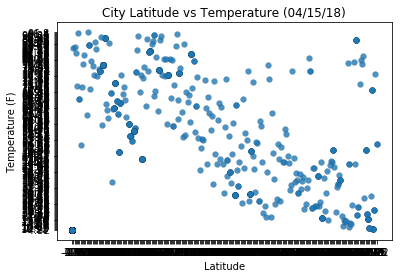

In [76]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, temps ,edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8,  label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

## Latitude vs Humidity Plot

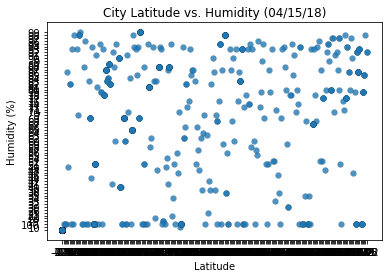

In [75]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            hums,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

## Latitude vs Cloudness Plot

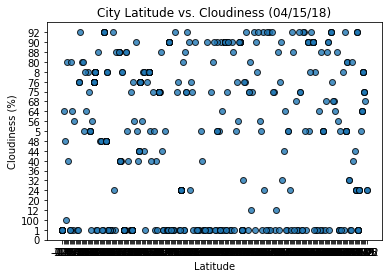

In [78]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            clouds,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

## Latitude vs Wind Speed Plot

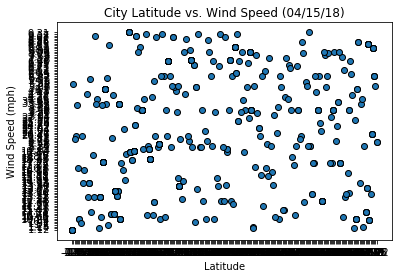

In [79]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            speeds,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()